In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.hht.hht import hht_analysis
from src.hht.hht import signal_window
import os

In [8]:
data_dir = '../data/input/NASA/1st_test/1st_test/'

In [9]:
col_names = ['b1_ch1', 'b1_ch2', 'b2_ch3', 'b2_ch4', 'b3_ch5', 'b3_ch6', 'b4_ch7', 'b4_ch8']
df = pd.read_csv(data_dir + '/2003.11.10.10.35.58', names=col_names, sep='\t')
df

,b1_ch1,b1_ch2,b2_ch3,b2_ch4,b3_ch5,b3_ch6,b4_ch7,b4_ch8
0,0.073,-0.205,-0.085,-0.222,-0.051,-0.137,-0.029,-0.276
1,-0.042,-0.205,-0.137,-0.208,-0.181,-0.083,-0.107,-0.229
2,-0.156,-0.171,-0.242,-0.159,-0.254,-0.295,-0.188,-0.176
3,-0.063,-0.171,-0.049,-0.149,-0.151,-0.269,-0.188,-0.144
4,0.010,-0.247,-0.005,-0.181,-0.107,-0.264,-0.164,-0.183
...,...,...,...,...,...,...,...,...
20475,-0.020,-0.181,0.000,-0.115,-0.261,-0.222,-0.024,-0.071
20476,0.005,-0.051,-0.017,-0.117,-0.066,-0.322,-0.085,-0.247
20477,-0.129,-0.181,-0.178,-0.171,0.076,-0.242,-0.125,-0.256
20478,-0.144,-0.020,-0.002,-0.159,-0.085,0.063,-0.151,0.059


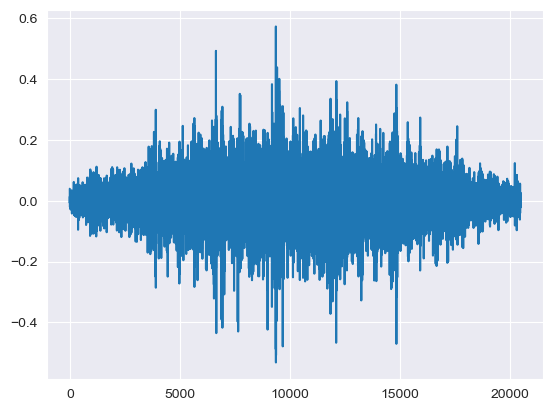

In [37]:
test_signal = df['b1_ch1']
signal_windowed = signal_window(test_signal, 3.)
plt.plot(signal_windowed)

In [38]:
imfs, imfs_ht = hht_analysis(signal_windowed, 20480, 20480)

In [39]:
imfs

array([[ 0.05039539,  0.02473472, -0.00607298, ..., -0.02920623,
        -0.03293043, -0.0417243 ],
       [-0.04358284, -0.04048458, -0.03098533, ...,  0.00186659,
         0.00277879,  0.00287904],
       [ 0.03477179,  0.0340881 ,  0.03230477, ...,  0.00089883,
        -0.00026333, -0.00098496],
       ...,
       [-0.01541318, -0.0154116 , -0.01541002, ..., -0.00134283,
        -0.00134268, -0.00134252],
       [ 0.00218958,  0.00218997,  0.00219036, ...,  0.00702464,
         0.00702453,  0.00702442],
       [ 0.00090572,  0.00090563,  0.00090554, ..., -0.00625185,
        -0.00625171, -0.00625157]])

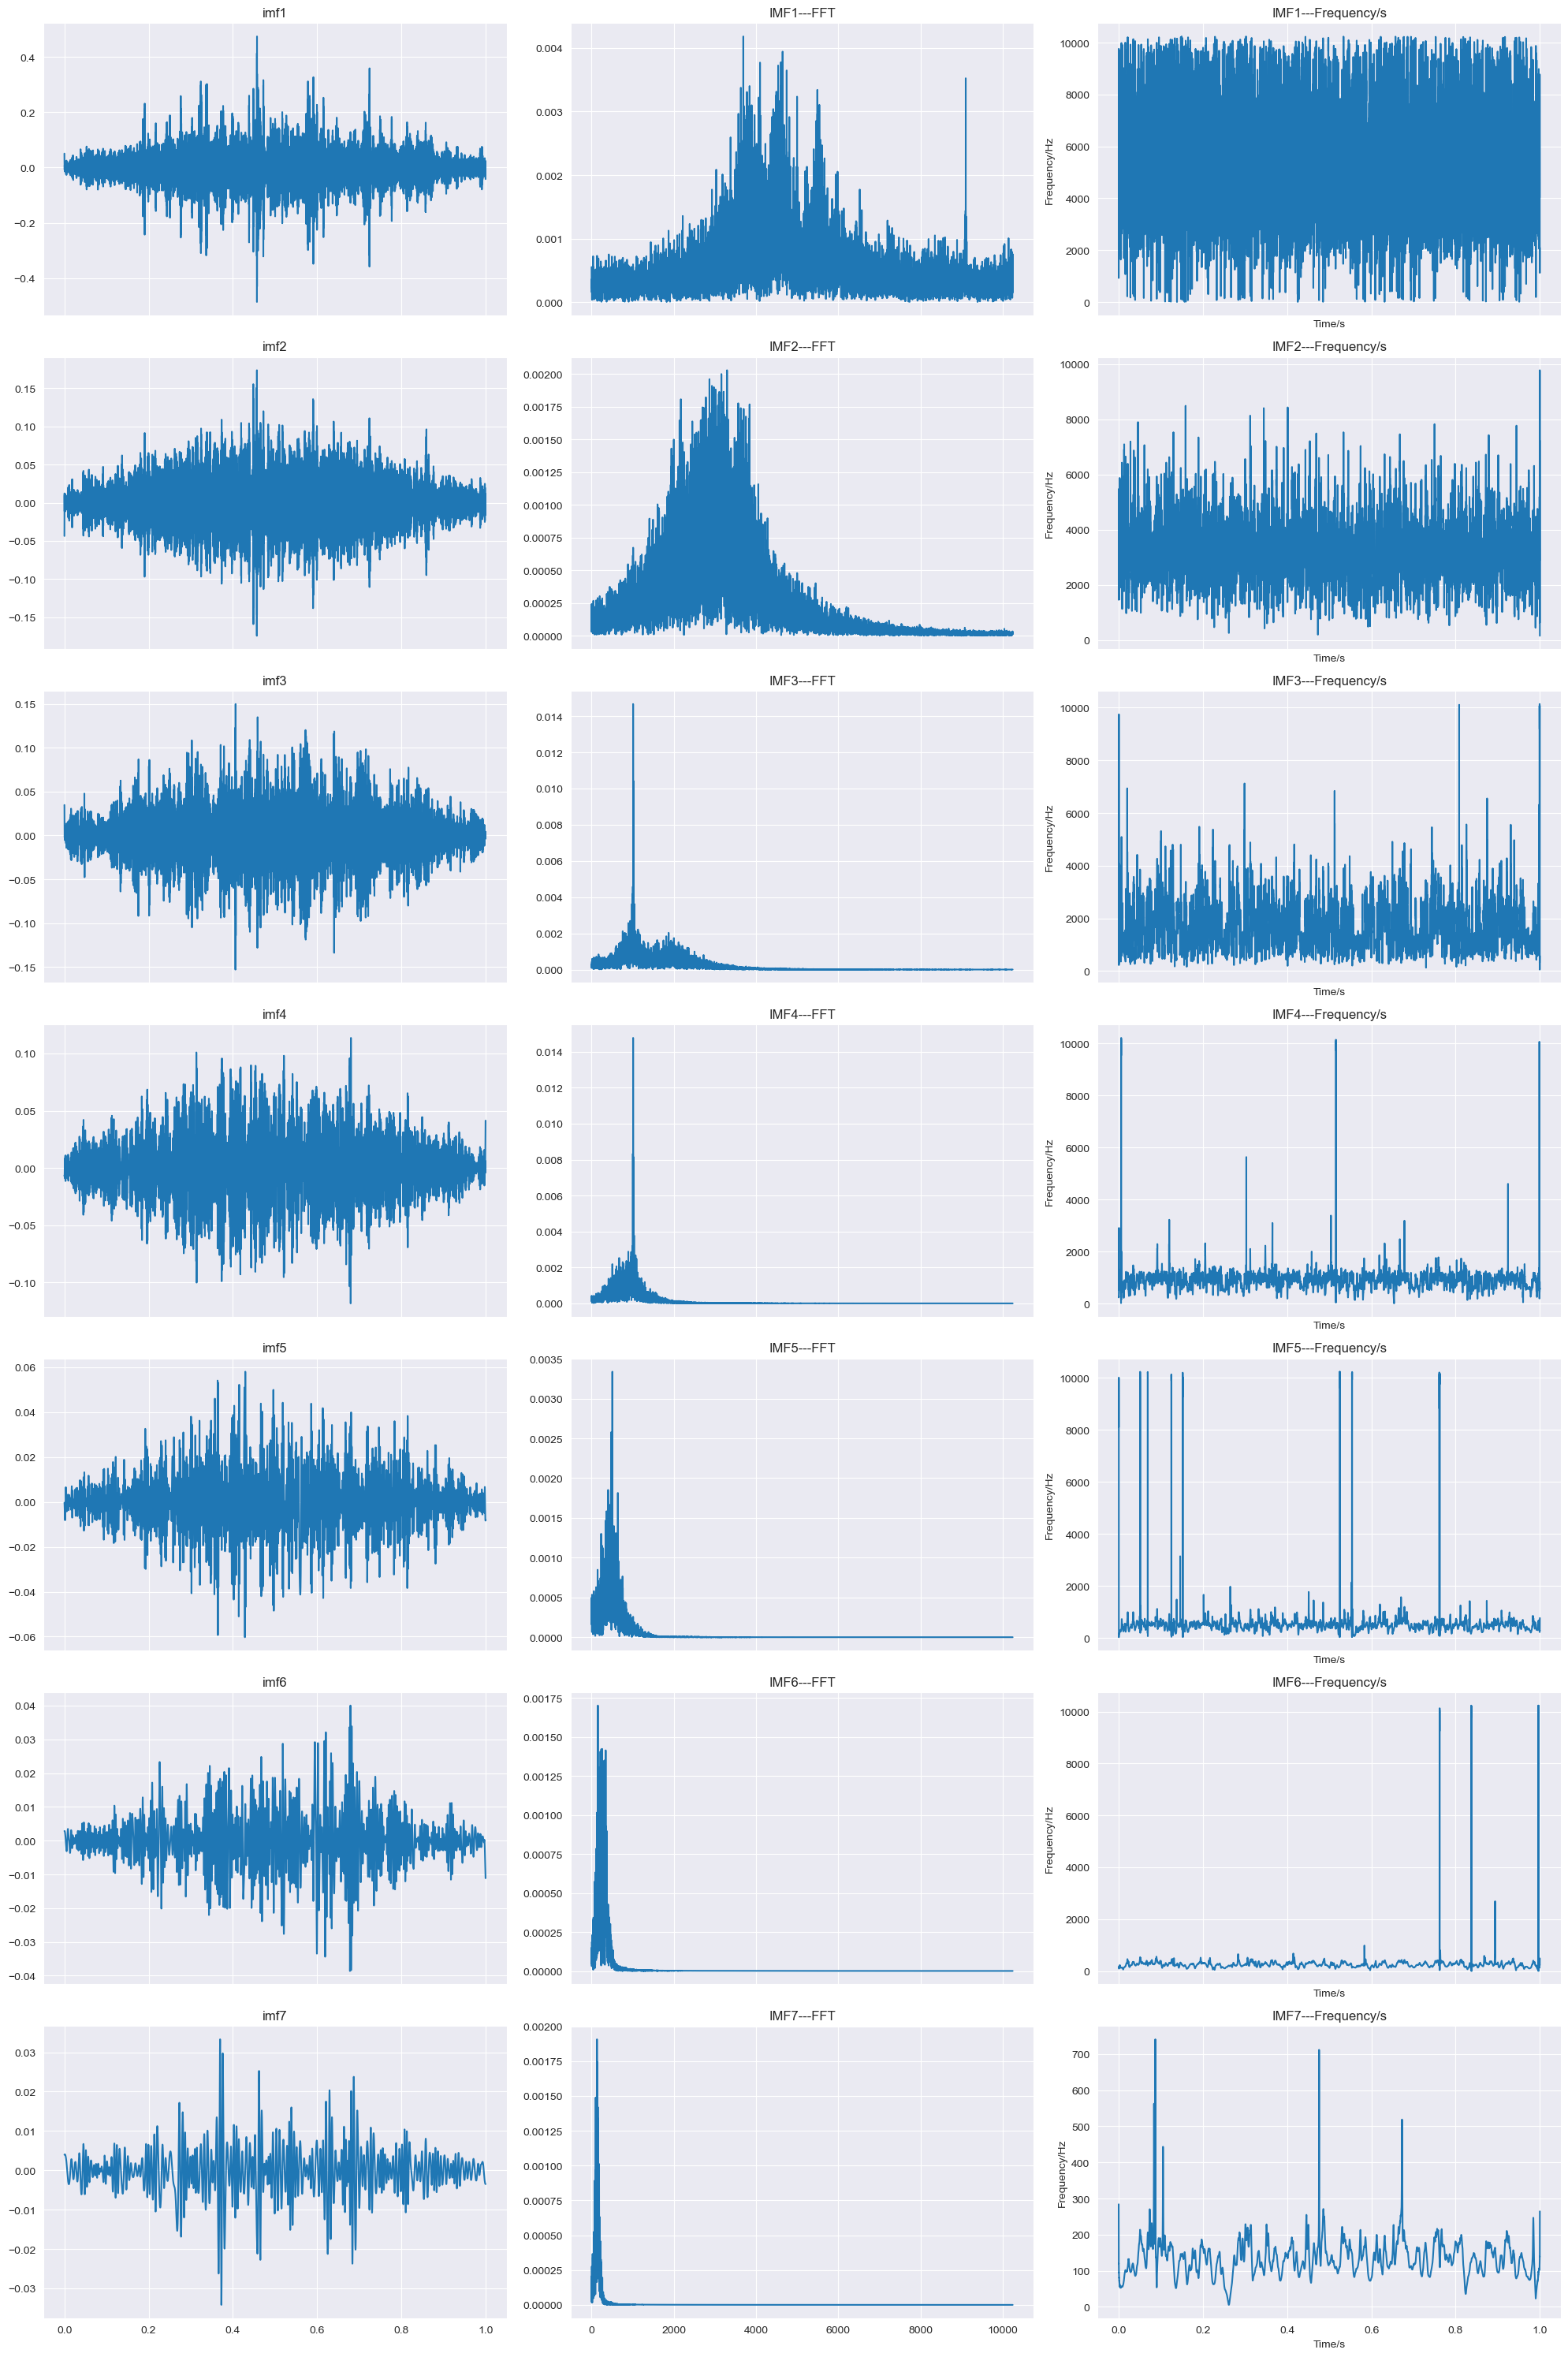

In [40]:
from src.hht.hht import hht_picture

hht_picture(imfs[:7], imfs_ht[:7], np.linspace(0, 1, 20480), 20480)

In [41]:
imfs = imfs[:-1]
imfs

array([[ 0.05039539,  0.02473472, -0.00607298, ..., -0.02920623,
        -0.03293043, -0.0417243 ],
       [-0.04358284, -0.04048458, -0.03098533, ...,  0.00186659,
         0.00277879,  0.00287904],
       [ 0.03477179,  0.0340881 ,  0.03230477, ...,  0.00089883,
        -0.00026333, -0.00098496],
       ...,
       [ 0.01043625,  0.01043428,  0.0104323 , ..., -0.00231207,
        -0.00231244, -0.00231279],
       [-0.01541318, -0.0154116 , -0.01541002, ..., -0.00134283,
        -0.00134268, -0.00134252],
       [ 0.00218958,  0.00218997,  0.00219036, ...,  0.00702464,
         0.00702453,  0.00702442]])

# 频率时间幅度谱

In [42]:
time_freq_amp = []

for i in range(imfs.shape[0]):
    analytic_signal = imfs_ht[i]
    inst_freq = np.diff(np.unwrap(np.angle(analytic_signal)))
    time_points = np.arange(20480)
    freq_points = inst_freq * (20480 / (2 * np.pi))
    time_freq_amp.append(np.vstack((time_points[:-1], freq_points)))
    pass

time_freq_amp = np.array(time_freq_amp)
time_freq_amp

array([[[ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00, ...,
          2.04760000e+04,  2.04770000e+04,  2.04780000e+04],
        [ 5.52539305e+03,  8.35363318e+03, -6.50074607e+03, ...,
          3.80442035e+03,  1.41335191e+03,  2.77163110e+03]],

       [[ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00, ...,
          2.04760000e+04,  2.04770000e+04,  2.04780000e+04],
        [ 2.65513430e+03,  9.93456389e+02,  1.93747034e+03, ...,
         -4.61232987e+02, -4.60360333e+02,  7.83819411e+02]],

       [[ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00, ...,
          2.04760000e+04,  2.04770000e+04,  2.04780000e+04],
        [ 1.88242269e+03,  3.09178387e+02,  1.16832549e+03, ...,
         -8.92507665e+02, -3.11049785e+02, -2.09248062e+01]],

       ...,

       [[ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00, ...,
          2.04760000e+04,  2.04770000e+04,  2.04780000e+04],
        [ 3.28998198e+02,  2.53105690e-02,  1.57280466e+02, ...,
          4.21296412e+01, -1.16821

In [43]:
time_freq_amp.shape

(12, 2, 20479)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10424\268063957.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(time_freq_amp[:, 0, :], time_freq_amp[:, 1, :], np.abs(imfs[:, :-1]))


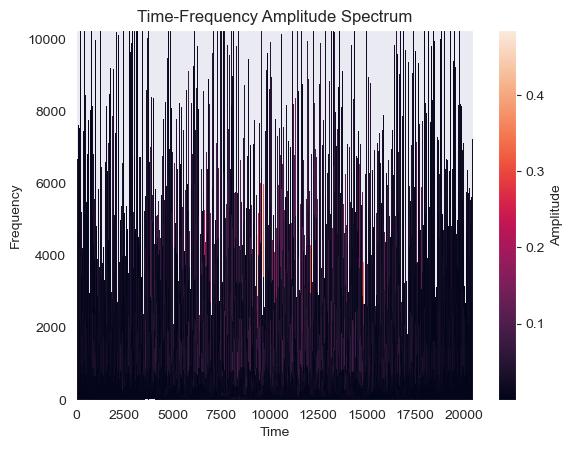

In [44]:
# plt.figure(figsize=(100, 50))

plt.pcolormesh(time_freq_amp[:, 0, :], time_freq_amp[:, 1, :], np.abs(imfs[:, :-1]))
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.ylim(0, 10245)
plt.title('Time-Frequency Amplitude Spectrum')
plt.colorbar(label='Amplitude')

plt.show()

In [45]:
from scipy.integrate import simps

t = np.linspace(0, 1, 20480)

energy_arr = []

for i in range(imfs.shape[0]):
    analytic_signal = imfs_ht[i]
    amp = np.abs(analytic_signal)
    energy = simps(amp**2, dx=t[1] - t[0])
    energy_arr.append(energy)
    pass

energy_arr

[0.005820548131396392,
 0.0016110774521345093,
 0.0018881536235156682,
 0.0013786782382371754,
 0.00034399711750630993,
 0.00013743308117327192,
 7.638450995693809e-05,
 7.898963338221886e-05,
 2.7631079053725785e-05,
 1.0183471052863158e-05,
 2.3047351189376125e-05,
 2.2792020432171635e-05]

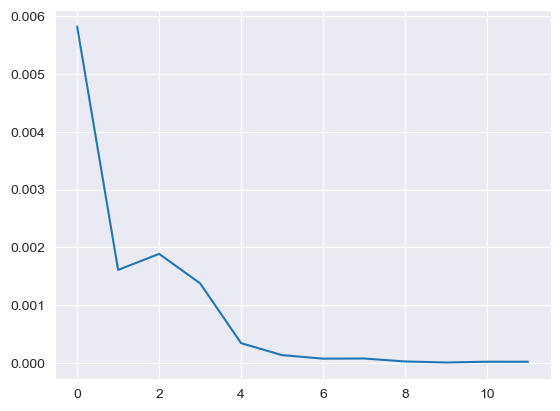

In [46]:
plt.plot(energy_arr)

In [3]:
import seaborn as sns

sns.kdeplot(energy_arr)

NameError: name 'energy_arr' is not defined

In [48]:
energy_ori = simps(np.abs(df['b1_ch1'])**2, dx=t[1]-t[0])
print(f'{energy_ori}, {np.sum(energy_arr)}')

0.02407785580757524, 0.011418915709030622


# 测试HHT能量序列

In [4]:
import pandas as pd
import os
import numpy as np
import scipy

In [50]:
energy_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    data_set = pd.read_csv(os.path.join(data_dir, filename), sep='\t', names=col_names)
    row_data = []

    for col_name in col_names:
        temp_signal = scipy.signal.detrend(data_set[col_name], type='linear')
        temp_signal *= np.kaiser(len(temp_signal), 3)
        imfs, imfs_ht = hht_analysis(temp_signal, 20480, 20480)
        energy_sum = 0
        for i in range(imfs.shape[0]):
            analytic_signal = imfs_ht[i]
            amp = np.abs(analytic_signal)
            energy = simps(amp**2, dx=t[1] - t[0])
            energy_sum += energy
            pass
        row_data.append(energy_sum)
        pass

    data_row = pd.DataFrame(np.array(row_data).reshape(1, 8))
    data_row.index = [filename]
    energy_data = energy_data.append(data_row)

    pass

energy_data.columns = col_names
energy_data

KeyboardInterrupt: 

In [25]:
energy_data = pd.read_csv('../data/output/Out_33.csv', index_col=0, header=None)
energy_data

,1,2,3,4,5,6,7,8
0,,,,,,,,
2003.10.22.12.06.24,0.007528,0.005833,0.009539,0.006701,0.009470,0.010432,0.004141,0.004968
2003.10.22.12.09.13,0.007091,0.005506,0.009377,0.006677,0.009814,0.010329,0.003960,0.004728
2003.10.22.12.14.13,0.007362,0.005559,0.009378,0.006589,0.009794,0.010159,0.003932,0.004845
2003.10.22.12.19.13,0.007162,0.005532,0.009373,0.006549,0.009525,0.010302,0.003946,0.004760
2003.10.22.12.24.13,0.007412,0.005672,0.009128,0.006418,0.009560,0.010121,0.003744,0.004815
...,...,...,...,...,...,...,...,...
2003.11.25.16.07.32,0.016315,0.011122,0.023731,0.014909,0.071464,0.074164,0.032805,0.027459
2003.11.25.23.13.21,0.018372,0.012324,0.029176,0.021874,0.279090,0.223101,0.040227,0.032247
2003.11.25.23.19.56,0.018249,0.012214,0.032438,0.024285,0.345026,0.275493,0.046412,0.033123


In [26]:
energy_data.index = pd.to_datetime(energy_data.index, format='%Y.%m.%d.%H.%M.%S')
energy_data.columns = col_names
energy_data.head()

,b1_ch1,b1_ch2,b2_ch3,b2_ch4,b3_ch5,b3_ch6,b4_ch7,b4_ch8
0,,,,,,,,
2003-10-22 12:06:24,0.007528,0.005833,0.009539,0.006701,0.009470,0.010432,0.004141,0.004968
2003-10-22 12:09:13,0.007091,0.005506,0.009377,0.006677,0.009814,0.010329,0.003960,0.004728
2003-10-22 12:14:13,0.007362,0.005559,0.009378,0.006589,0.009794,0.010159,0.003932,0.004845
2003-10-22 12:19:13,0.007162,0.005532,0.009373,0.006549,0.009525,0.010302,0.003946,0.004760
2003-10-22 12:24:13,0.007412,0.005672,0.009128,0.006418,0.009560,0.010121,0.003744,0.004815


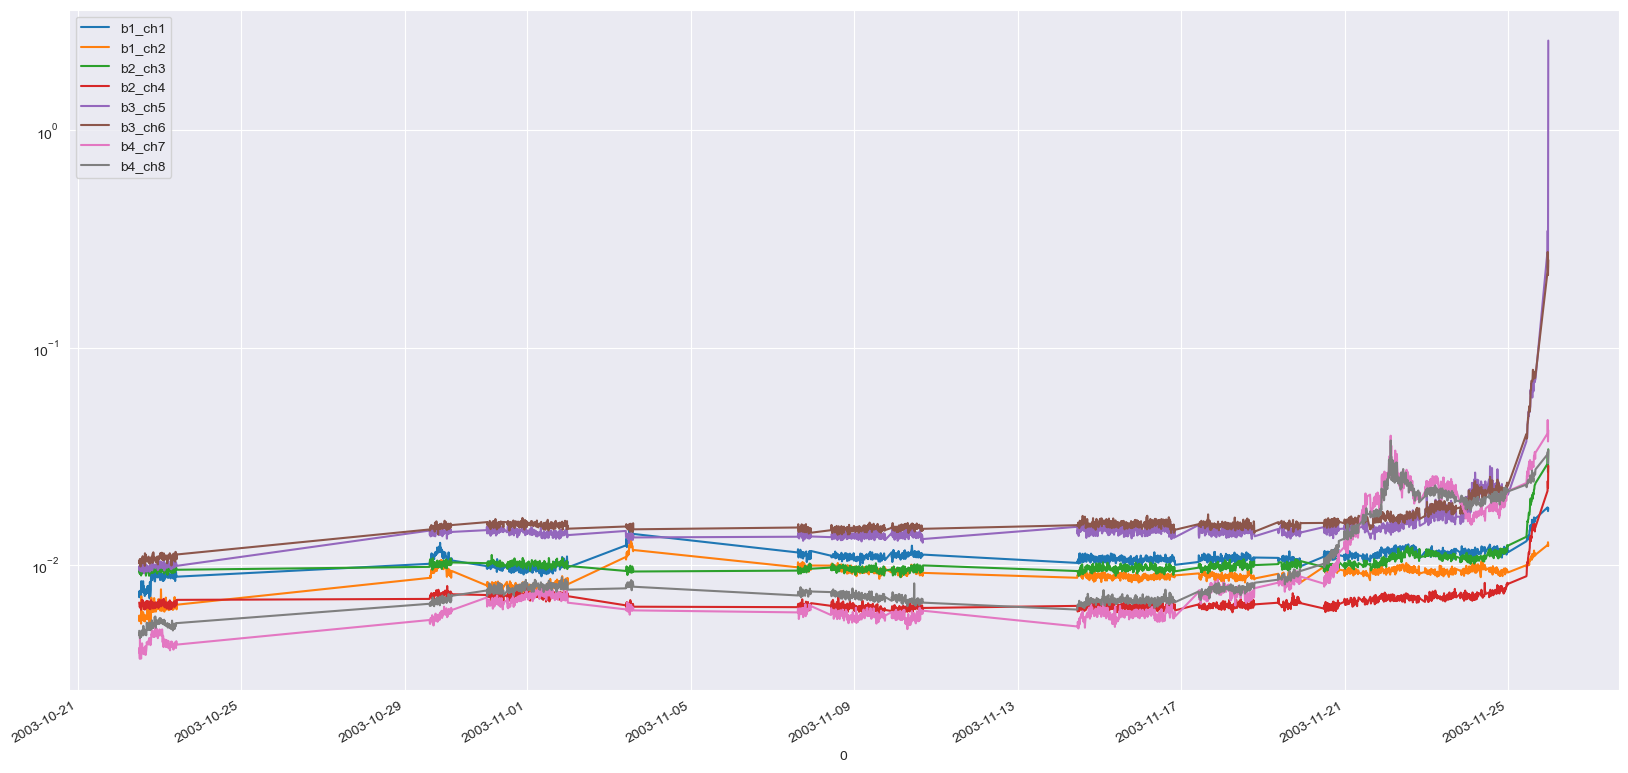

In [11]:
energy_data.plot(figsize=(20, 10))
plt.yscale('log')

E:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Data must be 1-dimensional

# 数据处理

In [12]:
from sklearn.preprocessing import FunctionTransformer

log_trans = FunctionTransformer(func=lambda x: np.log(x), validate=False)

data_all = log_trans.transform(energy_data)
data_all

,b1_ch1,b1_ch2,b2_ch3,b2_ch4,b3_ch5,b3_ch6,b4_ch7,b4_ch8
0,,,,,,,,
2003-10-22 12:06:24,-4.889126,-5.144224,-4.652367,-5.005499,-4.659626,-4.562877,-5.486818,-5.304738
2003-10-22 12:09:13,-4.948929,-5.201917,-4.669495,-5.009086,-4.623945,-4.572800,-5.531511,-5.354253
2003-10-22 12:14:13,-4.911424,-5.192337,-4.669389,-5.022354,-4.625985,-4.589395,-5.538607,-5.329808
2003-10-22 12:19:13,-4.938966,-5.197206,-4.669922,-5.028443,-4.653835,-4.575417,-5.535053,-5.347508
2003-10-22 12:24:13,-4.904655,-5.172213,-4.696409,-5.048649,-4.650168,-4.593143,-5.587601,-5.336019
...,...,...,...,...,...,...,...,...
2003-11-25 16:07:32,-4.115670,-4.498830,-3.740973,-4.205790,-2.638561,-2.601476,-3.417174,-3.595061
2003-11-25 23:13:21,-3.996928,-4.396207,-3.534409,-3.822457,-1.276221,-1.500131,-3.213217,-3.434330
2003-11-25 23:19:56,-4.003645,-4.405172,-3.428425,-3.717896,-1.064136,-1.289193,-3.070197,-3.407527


<AxesSubplot:xlabel='0'>

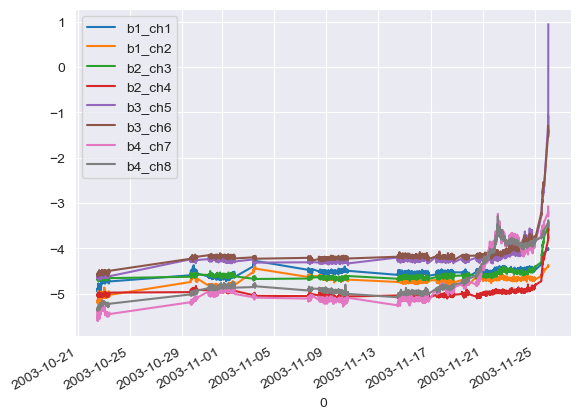

In [13]:
data_all.plot()

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaler = MinMaxScaler()

data_set = pd.DataFrame(scaler.fit_transform(data_all), index=data_all.index, columns=data_all.columns)

In [15]:
import seaborn as sns

<AxesSubplot:xlabel='0'>

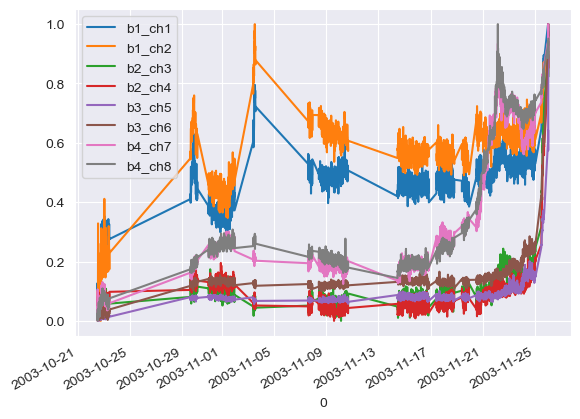

In [16]:
data_set.plot()

In [17]:
pca = PCA(n_components=4, svd_solver='full')

data_test = pd.DataFrame(pca.fit_transform(data_set))
data_test

,0,1,2,3
0,-0.604297,-0.402645,0.088451,0.013294
1,-0.661583,-0.470980,0.100842,0.035953
2,-0.646810,-0.447221,0.090714,0.012025
3,-0.659091,-0.462865,0.090454,0.028971
4,-0.659818,-0.420878,0.066636,0.019720
...,...,...,...,...
2151,1.084481,0.225559,0.692513,-0.091082
2152,1.369846,0.398113,1.078403,0.032049
2153,1.444424,0.380516,1.189274,0.046499
2154,1.305955,0.419999,1.045057,0.074624


<AxesSubplot:>

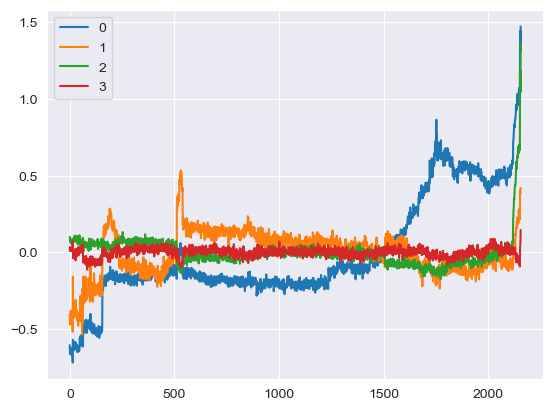

In [18]:
data_test.plot()

In [19]:
time_arr = data_all.index
time_arr

DatetimeIndex(['2003-10-22 12:06:24', '2003-10-22 12:09:13',
               '2003-10-22 12:14:13', '2003-10-22 12:19:13',
               '2003-10-22 12:24:13', '2003-10-22 12:29:13',
               '2003-10-22 12:34:13', '2003-10-22 12:39:13',
               '2003-10-22 12:44:13', '2003-10-22 12:49:13',
               ...
               '2003-11-25 15:17:32', '2003-11-25 15:27:32',
               '2003-11-25 15:37:32', '2003-11-25 15:47:32',
               '2003-11-25 15:57:32', '2003-11-25 16:07:32',
               '2003-11-25 23:13:21', '2003-11-25 23:19:56',
               '2003-11-25 23:29:56', '2003-11-25 23:39:56'],
              dtype='datetime64[ns]', name=0, length=2156, freq=None)

In [20]:
rul_real_arr = time_arr - time_arr[2155]
rul_real_arr

TimedeltaIndex(['-35 days +12:26:28', '-35 days +12:29:17',
                '-35 days +12:34:17', '-35 days +12:39:17',
                '-35 days +12:44:17', '-35 days +12:49:17',
                '-35 days +12:54:17', '-35 days +12:59:17',
                '-35 days +13:04:17', '-35 days +13:09:17',
                ...
                 '-1 days +15:37:36',  '-1 days +15:47:36',
                 '-1 days +15:57:36',  '-1 days +16:07:36',
                 '-1 days +16:17:36',  '-1 days +16:27:36',
                 '-1 days +23:33:25',  '-1 days +23:40:00',
                 '-1 days +23:50:00',    '0 days 00:00:00'],
               dtype='timedelta64[ns]', name=0, length=2156, freq=None)

## 插值

In [21]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2156 entries, 2003-10-22 12:06:24 to 2003-11-25 23:39:56
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   b1_ch1  2156 non-null   float64
 1   b1_ch2  2156 non-null   float64
 2   b2_ch3  2156 non-null   float64
 3   b2_ch4  2156 non-null   float64
 4   b3_ch5  2156 non-null   float64
 5   b3_ch6  2156 non-null   float64
 6   b4_ch7  2156 non-null   float64
 7   b4_ch8  2156 non-null   float64
dtypes: float64(8)
memory usage: 151.6 KB


In [51]:
energy_data_rul = energy_data
energy_data_rul['rul'] = rul_real_arr

In [30]:
energy_data_rul.describe()

,b1_ch1,b1_ch2,b2_ch3,b2_ch4,b3_ch5,b3_ch6,b4_ch7,b4_ch8,rul
count,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156
mean,0.010750,0.008897,0.010170,0.006869,0.016828,0.016681,0.010188,0.010787,-14 days +18:15:31.421150279
std,0.001140,0.001030,0.001587,0.001171,0.056679,0.011559,0.006929,0.006205,9 days 19:09:01.305735663
min,0.006667,0.005341,0.008769,0.005910,0.009143,0.009819,0.003692,0.004597,-35 days +12:26:28
25%,0.010350,0.008621,0.009563,0.006406,0.013749,0.014849,0.005873,0.006917,-23 days +14:39:18
50%,0.010810,0.009099,0.009865,0.006632,0.014287,0.015349,0.006936,0.007680,-11 days +18:33:50
75%,0.011272,0.009451,0.010292,0.007127,0.014978,0.016046,0.011764,0.013179,-5 days +00:16:37
max,0.018372,0.013037,0.034007,0.028541,2.588752,0.275493,0.046412,0.037338,0 days 00:00:00


<AxesSubplot:xlabel='0'>

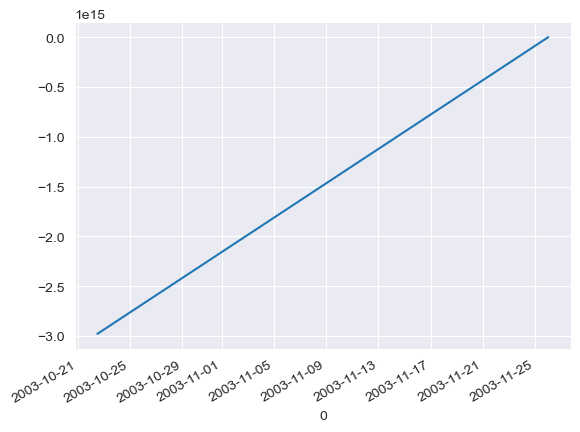

In [32]:
energy_data_rul['rul'].plot()

In [36]:
energy_data_rul['rul']

0
2003-10-22 12:06:24   -35 days +12:26:28
2003-10-22 12:09:13   -35 days +12:29:17
2003-10-22 12:14:13   -35 days +12:34:17
2003-10-22 12:19:13   -35 days +12:39:17
2003-10-22 12:24:13   -35 days +12:44:17
                             ...        
2003-11-25 16:07:32    -1 days +16:27:36
2003-11-25 23:13:21    -1 days +23:33:25
2003-11-25 23:19:56    -1 days +23:40:00
2003-11-25 23:29:56    -1 days +23:50:00
2003-11-25 23:39:56      0 days 00:00:00
Name: rul, Length: 2156, dtype: timedelta64[ns]

In [52]:
energy_data_rul['rul'] = energy_data_rul['rul'] / pd.Timedelta(minutes=1)
energy_data_rul['rul']

0
2003-10-22 12:06:24   -49653.533333
2003-10-22 12:09:13   -49650.716667
2003-10-22 12:14:13   -49645.716667
2003-10-22 12:19:13   -49640.716667
2003-10-22 12:24:13   -49635.716667
                           ...     
2003-11-25 16:07:32     -452.400000
2003-11-25 23:13:21      -26.583333
2003-11-25 23:19:56      -20.000000
2003-11-25 23:29:56      -10.000000
2003-11-25 23:39:56        0.000000
Name: rul, Length: 2156, dtype: float64

## 划分

In [53]:
energy_data_rul['rul_diff'] = energy_data_rul['rul'].diff()
energy_data_rul.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2156 entries, 2003-10-22 12:06:24 to 2003-11-25 23:39:56
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   b1_ch1    2156 non-null   float64
 1   b1_ch2    2156 non-null   float64
 2   b2_ch3    2156 non-null   float64
 3   b2_ch4    2156 non-null   float64
 4   b3_ch5    2156 non-null   float64
 5   b3_ch6    2156 non-null   float64
 6   b4_ch7    2156 non-null   float64
 7   b4_ch8    2156 non-null   float64
 8   rul       2156 non-null   float64
 9   rul_diff  2155 non-null   float64
 10  group     2156 non-null   int32  
dtypes: float64(10), int32(1)
memory usage: 193.7 KB


In [54]:
max_rul_diff = 10
energy_data_rul['group'] = (energy_data_rul['rul_diff'] > max_rul_diff).cumsum().fillna(0).astype(int)
energy_data_rul

,b1_ch1,b1_ch2,b2_ch3,b2_ch4,b3_ch5,b3_ch6,b4_ch7,b4_ch8,rul,rul_diff,group
0,,,,,,,,,,,
2003-10-22 12:06:24,0.007528,0.005833,0.009539,0.006701,0.009470,0.010432,0.004141,0.004968,-49653.533333,NaN,0
2003-10-22 12:09:13,0.007091,0.005506,0.009377,0.006677,0.009814,0.010329,0.003960,0.004728,-49650.716667,2.816667,0
2003-10-22 12:14:13,0.007362,0.005559,0.009378,0.006589,0.009794,0.010159,0.003932,0.004845,-49645.716667,5.000000,0
2003-10-22 12:19:13,0.007162,0.005532,0.009373,0.006549,0.009525,0.010302,0.003946,0.004760,-49640.716667,5.000000,0
2003-10-22 12:24:13,0.007412,0.005672,0.009128,0.006418,0.009560,0.010121,0.003744,0.004815,-49635.716667,5.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:32,0.016315,0.011122,0.023731,0.014909,0.071464,0.074164,0.032805,0.027459,-452.400000,10.000000,24
2003-11-25 23:13:21,0.018372,0.012324,0.029176,0.021874,0.279090,0.223101,0.040227,0.032247,-26.583333,425.816667,25
2003-11-25 23:19:56,0.018249,0.012214,0.032438,0.024285,0.345026,0.275493,0.046412,0.033123,-20.000000,6.583333,25


(array([12346., 12350., 12354., 12357., 12361., 12365., 12369., 12373.,
        12377., 12381.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

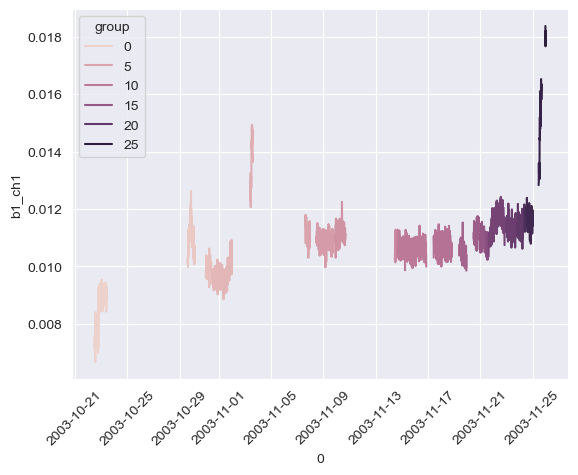

In [55]:
sns.lineplot(data=energy_data_rul, x=energy_data_rul.index, y='b1_ch1', hue='group')
plt.xticks(rotation=45)